In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:

data = pd.read_csv("StudentPerformanceFactors.csv")
print(data.tail())
print(data.head())
print(data.columns)



      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6602           Medium             Yes                  1          High   
6603

In [25]:
data = data[['Hours_Studied', 'Attendance', 'Exam_Score']]
print(data.head())
print(data.info())
print(data.describe())


   Hours_Studied  Attendance  Exam_Score
0             23          84          67
1             19          64          61
2             24          98          74
3             29          89          71
4             19          92          70
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  6607 non-null   int64
 1   Attendance     6607 non-null   int64
 2   Exam_Score     6607 non-null   int64
dtypes: int64(3)
memory usage: 155.0 KB
None
       Hours_Studied   Attendance   Exam_Score
count    6607.000000  6607.000000  6607.000000
mean       19.975329    79.977448    67.235659
std         5.990594    11.547475     3.890456
min         1.000000    60.000000    55.000000
25%        16.000000    70.000000    65.000000
50%        20.000000    80.000000    67.000000
75%        24.000000    90.000000    69.000000
max        44.000

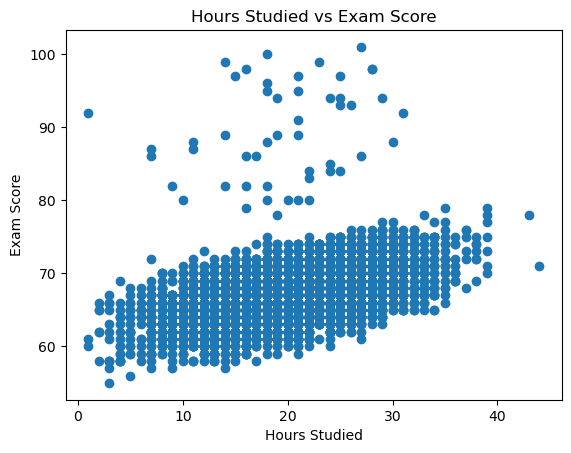

In [27]:
plt.scatter(data['Hours_Studied'], data['Exam_Score'])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()


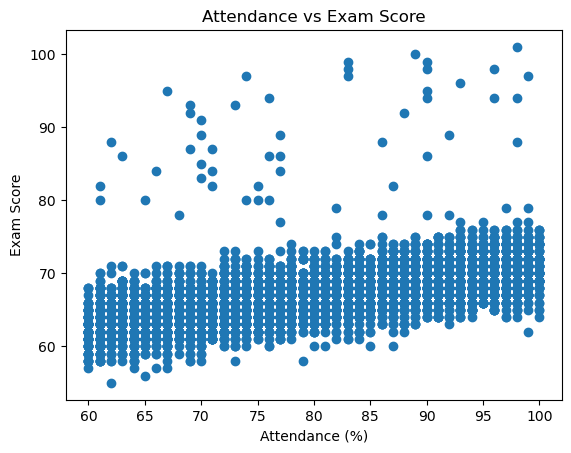

In [28]:
plt.scatter(data['Attendance'], data['Exam_Score'])
plt.xlabel("Attendance (%)")
plt.ylabel("Exam Score")
plt.title("Attendance vs Exam Score")
plt.show()


In [29]:
X = data[['Hours_Studied', 'Attendance']]
y = data['Exam_Score']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(X_test)
print(y_pred[:5])


[65.46382715 66.04169271 69.72143504 67.12104    64.16528988]


In [33]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 1.4689640272451199
R2 Score: 0.589028125951463


In [34]:
new_student = np.array([[4, 90]])  # 4 hours study, 90% attendance
predicted_score = model.predict(new_student)

print("Predicted Exam Score:", predicted_score[0])


Predicted Exam Score: 64.6111439853758


C:\Users\HP PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
